In [1]:
import pandas as pd
import os
from pathlib import Path
import sys
sys.path.append("./../")
#from scripts.framework.utils import compute_pareto_front

project_root = "../"

In [2]:
num_workers = 3
dataset = "titanic"
truth_dir = os.path.join(project_root, "truth", dataset)

dfs = []
for i in range(num_workers):
    path = os.path.join(truth_dir, f"{dataset}.multi_attrs.causal.worker{i}.csv")
    #path = os.path.join(truth_dir, f"{dataset}.multi_attrs.IterativeImputer.0.005.worker{i}.csv")
    dfs.append(pd.read_csv(path))
    print(f"Appended {path}")

df = pd.concat(dfs, ignore_index=True)
print("Appended all files!")

Appended ../truth/titanic/titanic.multi_attrs.causal.worker0.csv
Appended ../truth/titanic/titanic.multi_attrs.causal.worker1.csv
Appended ../truth/titanic/titanic.multi_attrs.causal.worker2.csv
Appended all files!


In [7]:
combined = df
#combined.to_csv(os.path.join(truth_dir, f"{dataset}.multi_attrs.DecisionTreeClassifier.csv"), index=False)
#combined.to_csv(os.path.join(truth_dir, f"{dataset}.multi_attrs.IterativeImputer.0.005.csv"), index=False)
combined.to_csv(os.path.join(truth_dir, f"{dataset}.multi_attrs.causal.csv"), index=False)
print("Merged all worker outputs into final CSV.")

Merged all worker outputs into final CSV.


In [4]:
import matplotlib.pyplot as plt
from typing import List, Union, Any, Tuple, Dict
import numpy as np
# plot scatter plot of utility and semantic metric for each cluster
def plot_pareto_points(pareto_points:List, est_pareto_points:List=None, est_pareto_points2:List=None, explored_points:List=None, points_df=None) -> Tuple:
    """
    Plot the estimated and ground truth Pareto fronts.
    Args:
        pareto_points (List): Ground truth Pareto front
        est_pareto_points (List): Estimated Pareto front
    """
    # Sort the points for plotting
    #pareto_points = sorted(pareto_points, key=lambda x: x[1])
    #est_pareto_points = sorted(est_pareto_points, key=lambda x: x[1])
    # Plot the Pareto front
    pareto_points = np.array(pareto_points)
    #est_pareto_points = np.array(est_pareto_points)
    #datapoints = np.array(datapoints)
    # Set size of the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    #f, ax = plt.subplots()
    #ax.scatter(datapoints[0], datapoints[1], c='gray', label='Data Points', alpha=0.3)
    markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
    #for cluster in points_df['Cluster'].unique():
    #    cluster_points = points_df[points_df['Cluster'] == cluster]
    #    marker_index = int(cluster % len(markers))
    #    ax.scatter(cluster_points['Semantic'], cluster_points['Utility'], label=cluster, color=colors[cluster], alpha=0.5, marker=markers[marker_index])

    #ax.scatter(explored_points[0], explored_points[1], c='gray', label='Explored Points', marker='x',)
    ax.plot(pareto_points[1], pareto_points[0], '+', c='red', label='Ground Truth', markersize=10)
    
    if est_pareto_points is not None:
        ax.plot(est_pareto_points[1], est_pareto_points[0], 's', c='green', label='Q-learning', markersize=10)
    
    if est_pareto_points2 is not None:
        ax.plot(est_pareto_points2[1], est_pareto_points2[0], 'v', c='purple', label='Random', markersize=10)
    
    ax.legend(bbox_to_anchor=(1, 1.2),ncol=2, fontsize=12)
    ax.set_ylabel('Semantic', fontsize=14)
    ax.set_xlabel('Utility', fontsize=14)
    #ax.set_title('Pareto Curve Estimated vs. Ground-Truth', fontsize=14)
    return fig, ax

In [2]:
# Read a few rows of the merged csv to check
dataset = "taxi"
use_case = 'modeling'
imputer = 'Iterative'
missing_data_fraction = 0.005

In [3]:
truth_dir = os.path.join(project_root, "truth", dataset)
# Load ground truth data
if use_case == 'modeling':
    utility_function = 'DecisionTreeClassifier'  # or 'RandomForestClassifier'
elif use_case == 'imputation':
    utility_function = f'{imputer}Imputer.{missing_data_fraction}'  # or 'KNNImputer', 'SimpleImputer'
elif use_case == 'causal':
    utility_function = 'causal'

gt_filepath = os.path.join(truth_dir, f'{dataset}.multi_attrs.{utility_function}.csv')
if not os.path.exists(gt_filepath):
    raise FileNotFoundError(f"Ground truth data not found at {gt_filepath}. Please ensure the file exists.")
df = pd.read_csv(gt_filepath)

In [4]:
df.head()

,passenger_count_ID,trip_distance_ID,duration_ID,passenger_count_bins,trip_distance_bins,duration_bins,utility,l2_norm,KLDiv,gpt_semantics
0,0,0,0,[0. 1. 2. 6.],[ 0. 0.5 1.5 3. 5. 10. ],[ 0. 3. 8. 15. 25. 30.],0.732584,1.000000,1.000000,4.000000
1,0,0,1,[0. 1. 2. 6.],[ 0. 0.5 1.5 3. 5. 10. ],[ 0. 15. 30.],0.557015,0.920219,0.942903,3.333333
2,0,0,2,[0. 1. 2. 6.],[ 0. 0.5 1.5 3. 5. 10. ],[ 0. 14.98 30. ],0.556465,0.920226,0.943289,3.000000
3,0,0,3,[0. 1. 2. 6.],[ 0. 0.5 1.5 3. 5. 10. ],[ 0. 10.65 30. ],0.616310,0.921666,0.944314,3.000000
4,0,0,4,[0. 1. 2. 6.],[ 0. 0.5 1.5 3. 5. 10. ],[ 0. 14.98 29.95],0.556465,0.920263,0.943289,3.000000


In [11]:
df[df["duration_bins"] == "[0. 9.99 19.97 29.95]"]

,passenger_count_ID,trip_distance_ID,duration_ID,passenger_count_bins,trip_distance_bins,duration_bins,utility,l2_norm,KLDiv,gpt_semantics


In [17]:
import re
import numpy as np
import pandas as pd
from typing import Dict, Tuple, Iterable, Union

_NUM_RE = re.compile(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?")

# --- Parsing helpers ---------------------------------------------------------

def _as_tuple_bins(v) -> Tuple[float, ...]:
    """
    Normalize any bins representation to a tuple[float].
    Accepts: list/tuple, numpy array (any dtype/shape), pandas Series, or
             strings like '[ 0.  0.5  1.5 ]'. Returns tuple(float,...).
    """
    if isinstance(v, str):
        return tuple(float(x) for x in _NUM_RE.findall(v))
    if isinstance(v, (list, tuple, pd.Series, np.ndarray)):
        return tuple(float(x) for x in np.asarray(v).ravel().tolist())
    if v is None or (isinstance(v, float) and np.isnan(v)):
        return tuple()
    raise TypeError(f"Unsupported bins type: {type(v)} -> {v!r}")

def _bins_cols(df: pd.DataFrame):
    """Columns that end with '_bins' in the given DataFrame."""
    return [c for c in df.columns if c.endswith("_bins")]

# --- Fast exact-lookup LUT ---------------------------------------------------

def build_utility_lookup(
    truth_df: pd.DataFrame,
    attrs: Iterable[str] = None,
    utility_col: str = "utility",
) -> Dict[Tuple[Tuple[float, ...], ...], float]:
    """
    Build a dict mapping (bins per attr as tuples) -> utility.
    Works even if truth_df has *_bins as lists/arrays/strings.
    """
    if attrs is None:
        bins_cols = _bins_cols(truth_df)
        attrs = [c[:-5] for c in bins_cols]  # strip '_bins'
    else:
        bins_cols = [f"{a}_bins" for a in attrs]

    lut = {}
    for _, row in truth_df.iterrows():
        key = tuple(_as_tuple_bins(row[c]) for c in bins_cols)
        lut[key] = float(row[utility_col])
    return lut

# --- Lookup with optional tolerance -----------------------------------------

def find_utility_from_partitions(
    partition_dict: Dict[str, Union[list, tuple, np.ndarray, pd.Series, str]],
    truth_or_lut: Union[pd.DataFrame, Dict[Tuple[Tuple[float, ...], ...], float]],
    attrs: Iterable[str] = None,
    utility_col: str = "utility",
) -> float:
    """
    Find the utility for bins in partition_dict.
    - If 'truth_or_lut' is a DataFrame, a LUT is built from it (using 'attrs' order
      or all '*_bins' columns if attrs=None).
    - If it's already a LUT (dict), it's used directly.
    - Accepts bins as lists/arrays/strings/etc. Exact match first; if not found and tol>0,
      falls back to tolerant scan with np.allclose(atol=tol, rtol=0).
    """
    # Normalize target bins to tuples; infer attrs if not provided and a DF is passed
    if isinstance(truth_or_lut, pd.DataFrame):
        if attrs is None:
            attrs = [c[:-5] for c in _bins_cols(truth_or_lut)]
        lut = build_utility_lookup(truth_or_lut, attrs=attrs, utility_col=utility_col)
    else:
        lut = truth_or_lut
        if attrs is None:
            # If attrs not given for a LUT, assume keys align with sorted partition_dict keys
            attrs = list(partition_dict.keys())

    target_key = tuple(_as_tuple_bins(partition_dict[a]) for a in attrs)

    # 1) Exact lookup (fast path)
    if target_key in lut:
        return float(lut[target_key])

    raise KeyError(
        f"No match for bins with attrs={tuple(attrs)}. "
        f"Target: {target_key}. Consider setting tol (e.g., tol=0.02)."
    )


In [19]:
partition_dict = {
    "passenger_count": [0,1,2,6],            # list is fine
    "trip_distance":   np.array([0,0.5,1.5,3,5,10]),  # numpy array, also fine
    "duration":        [0,15,30],            # list again
}

u = find_utility_from_partitions(
    partition_dict,
    truth_df,                                # pass the DataFrame directly
    attrs=("passenger_count","trip_distance","duration") 
)
print(u)  # 0.557015

0.5570151305926218


In [15]:
truth_df.head()

,passenger_count_ID,trip_distance_ID,duration_ID,passenger_count_bins,trip_distance_bins,duration_bins,utility,l2_norm,KLDiv,gpt_semantics
0,0,0,0,"[0.0, 1.0, 2.0, 6.0]","[0.0, 0.5, 1.5, 3.0, 5.0, 10.0]","[0.0, 3.0, 8.0, 15.0, 25.0, 30.0]",0.732584,1.000000,1.000000,4.000000
1,0,0,1,"[0.0, 1.0, 2.0, 6.0]","[0.0, 0.5, 1.5, 3.0, 5.0, 10.0]","[0.0, 15.0, 30.0]",0.557015,0.920219,0.942903,3.333333
2,0,0,2,"[0.0, 1.0, 2.0, 6.0]","[0.0, 0.5, 1.5, 3.0, 5.0, 10.0]","[0.0, 14.98, 30.0]",0.556465,0.920226,0.943289,3.000000
3,0,0,3,"[0.0, 1.0, 2.0, 6.0]","[0.0, 0.5, 1.5, 3.0, 5.0, 10.0]","[0.0, 10.65, 30.0]",0.616310,0.921666,0.944314,3.000000
4,0,0,4,"[0.0, 1.0, 2.0, 6.0]","[0.0, 0.5, 1.5, 3.0, 5.0, 10.0]","[0.0, 14.98, 29.95]",0.556465,0.920263,0.943289,3.000000


In [19]:
len(df)

870

In [10]:
# Find the lowest and highest utility
min_utility = df['utility'].min()
max_utility = df['utility'].max()
print(f"Min utility: {min_utility}")
print(f"Max utility: {max_utility}")
# Normalize the utility values to be between 0 and 1
#gt_df['utility'] = (gt_df['utility'] - min_utility) / (max_utility - min_utility)

Min utility: 0.275058275058275
Max utility: 1.0


In [11]:
def compute_pareto_front(datapoints: List) -> List[int]:
    """
    Fast Pareto front computation for 2D points (maximize both objectives).
    Handles ties and returns indices of non-dominated points.
    
    Args:
        datapoints (List): 2D list/array of shape (2, N)
            Row 0: semantic similarity
            Row 1: utility

    Returns:
        List[int]: Indices of Pareto-optimal points
    """
    datapoints = np.array(datapoints)
    assert datapoints.shape[0] == 2, "Expected datapoints of shape (2, N)"
    
    points = datapoints.T  # shape (N, 2)
    indices = np.arange(len(points))

    # Sort by semantic similarity descending, breaking ties with utility descending
    sorted_order = np.lexsort((-points[:,1], -points[:,0]))
    sorted_points = points[sorted_order]
    sorted_indices = indices[sorted_order]

    pareto_indices = []
    max_utility = -np.inf

    for i in range(len(sorted_points)):
        if sorted_points[i][1] > max_utility:
            pareto_indices.append(sorted_indices[i])
            max_utility = sorted_points[i][1]

    return pareto_indices

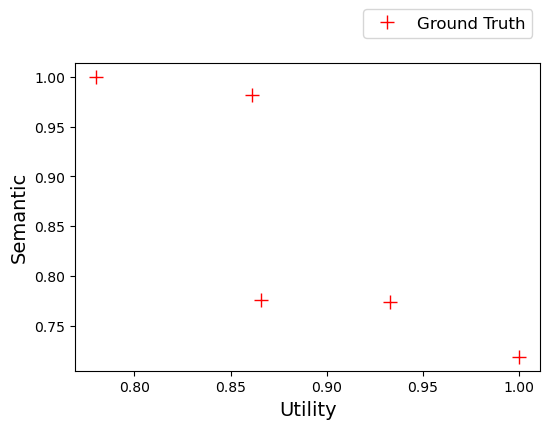

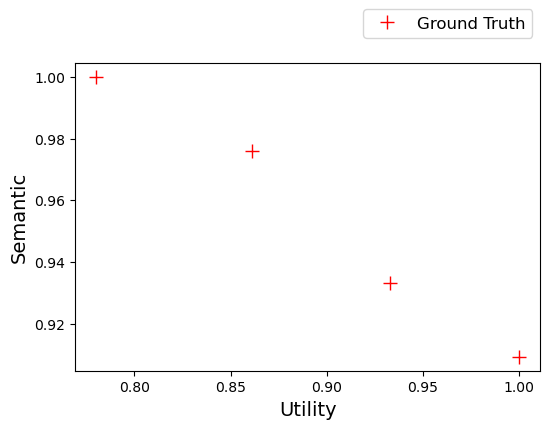

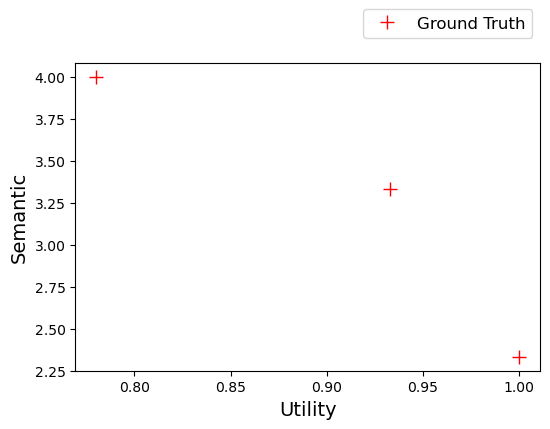

In [12]:
# Find the pareto front
gt_df = df
semantic_measures = ['KLDiv', 'l2_norm', 'gpt_semantics'] #'l2_norm', 'KLDiv', 
for semantic_metric in semantic_measures:
    gt_df = df.copy()
    datapoints = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
    lst = compute_pareto_front(datapoints)
    gt_df["Estimated"] = 0
    gt_df.loc[lst, "Estimated"] = 1
    gt_df["Explored"] = 1
    
    # Save the results
    gt_df = gt_df[gt_df['Estimated'] == 1]
    # remove duplicates
    gt_df = gt_df.drop_duplicates(subset=[semantic_metric, 'utility'])
    points = [np.array(gt_df[semantic_metric].values), np.array(gt_df['utility'].values)]
    fig, ax = plot_pareto_points(points)
    plt.show()
    gt_df.to_csv(os.path.join(project_root, "truth", f'{dataset}.multi_attrs.{utility_function}.{semantic_metric}.csv'), index=False)